# Group Project gang

We are uploading all csv files of the Scarlet & Violet main and special sets.

Sets: SV01, SV02, SV03, SV: Scarlet & Violet 151, SV04, SV: Paldean Fates, SV05, SV06, SV: Shrouded Fable, SV07, SV08, SV: Prismatic Evolutions, SV09

In [40]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

sv01_df = pd.read_csv('SV01ScarletAndVioletBaseSetProductsAndPrices.csv')
sv02_df = pd.read_csv('SV02PaldeaEvolvedProductsAndPrices.csv')
sv03_df = pd.read_csv('SV03ObsidianFlamesProductsAndPrices.csv')
sv04_df = pd.read_csv('SV04ParadoxRiftProductsAndPrices.csv')
sv05_df = pd.read_csv('SV05TemporalForcesProductsAndPrices.csv')
sv06_df = pd.read_csv('SV06TwilightMasqueradeProductsAndPrices.csv')
sv07_df = pd.read_csv('SV07StellarCrownProductsAndPrices.csv')
sv08_df = pd.read_csv('SV08SurgingSparksProductsAndPrices.csv')
sv09_df = pd.read_csv('SV09JourneyTogetherProductsAndPrices.csv')
sv_151_df = pd.read_csv('SVScarletAndViolet151ProductsAndPrices.csv')
sv_pf_df = pd.read_csv('SVPaldeanFatesProductsAndPrices.csv')
sv_sf_df = pd.read_csv('SVShroudedFableProductsAndPrices.csv')
sv_pe_df = pd.read_csv('SVPrismaticEvolutionsProductsAndPrices.csv')

We then merge all of these sets into a master set, filter out unnecessary columns, and add a column for the textual set name based on groupId variable.

In [28]:
master_df = pd.concat([sv01_df, sv02_df, sv03_df, sv04_df, sv05_df, sv06_df, sv07_df, sv08_df, sv09_df, sv_151_df, sv_pf_df, sv_sf_df, sv_pe_df])
master_df = master_df[['productId', 'name', 'groupId', 'lowPrice', 'highPrice', 'marketPrice', 'extRarity']]

# filter for cards of specific rarity
master_df = master_df[(master_df['extRarity'] == 'Special Illustration Rare') | (master_df['extRarity'] == 'Illustration Rare') | (master_df['extRarity'] == 'Hyper Rare')]

# add textual set name column
def get_textset(setId):
    setId_list = [22873, 23120, 23228, 23286, 23381, 23473, 23537, 23651, 24073, 23237, 23353, 23529, 23821]
    textId_list = [
        'Scarlet And Violet Base',
        'Paldea Evolved',
        'Obsidian Flames',
        'Paradox Rift',
        'Temporal Forces',
        'Twilight Masquerade',
        'Stellar Crown',
        'Surging Sparks',
        'Journey Together',
        'Scarlet And Violet 151',
        'Paldean Fates',
        'Shrouded Fable',
        'Prismatic Evolutions'
    ]
    index = setId_list.index(setId)
    return textId_list[index]

master_df['set'] = master_df['groupId'].apply(get_textset)

# add release date
def get_dateset(setId):
    name_list = ['Scarlet And Violet Base',
        'Paldea Evolved',
        'Obsidian Flames',
        'Paradox Rift',
        'Temporal Forces',
        'Twilight Masquerade',
        'Stellar Crown',
        'Surging Sparks',
        'Journey Together',
        'Scarlet And Violet 151',
        'Paldean Fates',
        'Shrouded Fable',
        'Prismatic Evolutions']
    date_list = [
        '05-31-2023',
        '06-09-2023',
        '08-11-2023',
        '10-03-2023',
        '03-22-2024',
        '05-24-2024',
        '09-13-2024',
        '11-08-2024',
        '03-28-2025',
        '09-22-2023',
        '01-26-2024',
        '09-02-2024',
        '01-17-2025'
    ]
    index = name_list.index(setId)
    return date_list[index]

master_df['set'] = master_df['groupId'].apply(get_textset)
master_df['release date'] = master_df['set'].apply(get_dateset)

# sort dataframe by card rarity
master_df = master_df.sort_values(by=['groupId', 'extRarity'])

# reset index
master_df = master_df.reset_index()
master_df.index +=1

master_df['release date'] = pd.to_datetime(master_df['release date'], format='%m-%d-%Y')

display(master_df)

,index,productId,name,groupId,lowPrice,highPrice,marketPrice,extRarity,set,release date
1,437,490043,Miraidon ex - 253/198,22873,4.99,60.00,5.76,Hyper Rare,Scarlet And Violet Base,2023-05-31
2,439,490045,Koraidon ex - 254/198,22873,3.00,28.20,5.50,Hyper Rare,Scarlet And Violet Base,2023-05-31
3,483,490294,Basic Fighting Energy - 258/198,22873,2.39,25.00,3.14,Hyper Rare,Scarlet And Violet Base,2023-05-31
4,484,490295,Basic Lightning Energy - 257/198,22873,3.00,50.00,5.01,Hyper Rare,Scarlet And Violet Base,2023-05-31
5,485,490296,Rare Candy - 256/198,22873,5.80,30.02,7.83,Hyper Rare,Scarlet And Violet Base,2023-05-31
...,...,...,...,...,...,...,...,...,...,...
437,338,623610,Iono's Bellibolt ex - 183/159,24073,135.00,180.00,136.62,Special Illustration Rare,Journey Together,2025-03-28
438,339,623611,Lillie's Clefairy ex - 184/159,24073,300.00,329.36,328.63,Special Illustration Rare,Journey Together,2025-03-28
439,340,623612,N's Zoroark ex - 185/159,24073,214.10,219.99,219.62,Special Illustration Rare,Journey Together,2025-03-28
440,341,623613,Hop's Zacian ex - 186/159,24073,175.00,179.99,178.79,Special Illustration Rare,Journey Together,2025-03-28


We will also have to fill in all NaN values, especially for the market prices of recent sets (ie. SV09 Journey Together).

In order to fill in the NaN values, we will take the average of the lowPrice and highPrice values and input the average into marketPrice.

In [29]:
def fill_market_price(row):
    if pd.isna(row['marketPrice']):
        low_high_average = (row['lowPrice'] + row['highPrice'])/2
        row['marketPrice'] = round(low_high_average, 2)
    return row['marketPrice']

master_df['marketPrice'] = master_df.apply(fill_market_price, axis=1)

## Hypothesis Tests

We will now conduct three hypothesis tests to observe trends and patterns in data.

### TEST I:
Using an ANOVA test, we plan on determining if the average price of cards of the same rarity vary significantly across all relevant sets
(relevant sets - scarlet and violet main and special sets)

Because we are testing multiple categories and observing if they exist within the same distribution, an ANOVA test would be appropriate.
Significance level = 0.05 (Level of confidence = 95%)

H0: There is no significant difference in the prices of the same card rarity across the relevant sets.
HA: There exists significant differences in the prices of the same card rarity across the relevant sets.

In [30]:
hr_df = master_df[master_df['extRarity'] == 'Hyper Rare']
ir_df = master_df[master_df['extRarity'] == 'Illustration Rare']
sir_df = master_df[master_df['extRarity'] == 'Special Illustration Rare']

#### Hyper Rare Cards:

In [31]:
# for Hyper Rare cards
hr_sets = hr_df.groupby('set', sort=False)
hr_average_prices = pd.DataFrame(columns=['set', 'averagePrice'])

for set,group in hr_sets:
    group = group.dropna(subset=['marketPrice']).sort_values(by='marketPrice')
    rarity_mean = group['marketPrice'].mean()
    row = {'set': set, 'averagePrice': round(rarity_mean, 2)}
    hr_average_prices = pd.concat([hr_average_prices, pd.DataFrame([row])], ignore_index=True)

hr_clean_avg = [group['marketPrice'].dropna().values for _, group in hr_df.groupby('set', sort=False)]

hr_res = sp.stats.f_oneway(*hr_clean_avg)
hr_tukey = sp.stats.tukey_hsd(*hr_clean_avg)

print(hr_res.pvalue)
print(hr_tukey)

C:\Users\leaks\AppData\Local\Temp\ipykernel_27904\553501463.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hr_average_prices = pd.concat([hr_average_prices, pd.DataFrame([row])], ignore_index=True)


1.2307944715509453e-06
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.690     1.000   -31.715    33.095
 (0 - 2)     -3.223     1.000   -46.699    40.252
 (0 - 3)     -0.230     1.000   -43.705    43.245
 (0 - 4)     -0.245     1.000   -34.451    33.962
 (0 - 5)     -2.320     1.000   -37.818    33.178
 (0 - 6)     -6.393     1.000   -41.891    29.104
 (0 - 7)     -5.483     1.000   -40.981    30.014
 (0 - 8)    -25.485     0.479   -62.715    11.745
 (0 - 9)     -7.690     1.000   -51.165    35.785
 (0 - 10)    -20.675     0.718   -56.173    14.823
 (0 - 11)    -21.691     0.717   -58.921    15.539
 (0 - 12)    -85.747     0.000  -129.222   -42.271
 (1 - 0)     -0.690     1.000   -33.095    31.715
 (1 - 2)     -3.913     1.000   -44.902    37.076
 (1 - 3)     -0.920     1.000   -41.909    40.069
 (1 - 4)     -0.935     1.000   -31.920    30.050
 (1 - 5)     -3.010     1.000   -35.415    29.395
 (1 - 

#### Illustration Rare Cards

In [32]:
# for Illustration Rare cards
ir_sets = ir_df.groupby('set', sort=False)
ir_average_prices = pd.DataFrame(columns=['set', 'averagePrice'])

for set,group in ir_sets:
    group = group.dropna(subset=['marketPrice']).sort_values(by='marketPrice')
    rarity_mean = group['marketPrice'].mean()
    row = {'set': set, 'averagePrice': round(rarity_mean, 2)}
    ir_average_prices = pd.concat([ir_average_prices, pd.DataFrame([row])], ignore_index=True)

ir_avg_prices = [group['marketPrice'].dropna().values for _, group in ir_df.groupby('set', sort=False)]

ir_res = sp.stats.f_oneway(*ir_avg_prices)
ir_tukey = sp.stats.tukey_hsd(*ir_avg_prices)

print(ir_res.pvalue)
print(ir_tukey)

C:\Users\leaks\AppData\Local\Temp\ipykernel_27904\836959014.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ir_average_prices = pd.concat([ir_average_prices, pd.DataFrame([row])], ignore_index=True)


0.030095002095401828
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -9.414     0.829   -26.916     8.089
 (0 - 2)      3.523     1.000   -19.959    27.004
 (0 - 3)    -14.061     0.575   -35.497     7.375
 (0 - 4)     -3.565     1.000   -21.272    14.142
 (0 - 5)     10.884     0.999   -29.788    51.556
 (0 - 6)     -1.691     1.000   -21.295    17.913
 (0 - 7)      0.258     1.000   -19.587    20.104
 (0 - 8)     -9.504     0.955   -31.364    12.357
 (0 - 9)     -2.183     1.000   -25.055    20.689
 (0 - 10)      3.248     1.000   -16.132    22.628
 (0 - 11)    -17.713     0.351   -41.194     5.769
 (1 - 0)      9.414     0.829    -8.089    26.916
 (1 - 2)     12.936     0.739    -9.203    35.075
 (1 - 3)     -4.648     1.000   -24.603    15.308
 (1 - 4)      5.848     0.987   -10.035    21.731
 (1 - 5)     20.298     0.875   -19.614    60.209
 (1 - 6)      7.722     0.959   -10.251    25.696
 (1 - 7) 

#### Special Illustration Rare Cards

In [33]:
# for Special Illustration Rare cards
sir_sets = sir_df.groupby('set', sort=False)
sir_average_prices = pd.DataFrame(columns=['set', 'averagePrice'])

for set,group in sir_sets:
    group = group.dropna(subset=['marketPrice']).sort_values(by='marketPrice')
    rarity_mean = group['marketPrice'].mean()
    row = {'set': set, 'averagePrice': round(rarity_mean, 2)}
    sir_average_prices = pd.concat([sir_average_prices, pd.DataFrame([row])], ignore_index=True)

sir_avg_prices = [group['marketPrice'].dropna().values for _, group in sir_df.groupby('set', sort=False)]

sir_res = sp.stats.f_oneway(*sir_avg_prices)
sir_tukey = sp.stats.tukey_hsd(*sir_avg_prices)

print(sir_res.pvalue)
print(sir_tukey)

C:\Users\leaks\AppData\Local\Temp\ipykernel_27904\2099931476.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sir_average_prices = pd.concat([sir_average_prices, pd.DataFrame([row])], ignore_index=True)


0.0008935513093533942
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -2.927     1.000  -202.617   196.763
 (0 - 2)      1.641     1.000  -250.949   254.231
 (0 - 3)    -61.460     1.000  -302.510   179.589
 (0 - 4)     -7.115     1.000  -206.805   192.575
 (0 - 5)    -72.959     0.998  -304.977   159.059
 (0 - 6)    -30.827     1.000  -249.576   187.922
 (0 - 7)    -52.331     1.000  -266.051   161.389
 (0 - 8)    -14.055     1.000  -281.967   253.857
 (0 - 9)    -18.202     1.000  -270.792   234.387
 (0 - 10)    -81.494     0.986  -295.213   132.226
 (0 - 11)   -186.551     0.029  -363.758    -9.344
 (0 - 12)   -177.559     0.470  -430.149    75.031
 (1 - 0)      2.927     1.000  -196.763   202.617
 (1 - 2)      4.568     1.000  -231.708   240.844
 (1 - 3)    -58.533     1.000  -282.430   165.363
 (1 - 4)     -4.188     1.000  -182.796   174.420
 (1 - 5)    -70.032     0.996  -284.175   144.111
 (1 - 6

### ANOVA Test Results + Tukey Test Results Analysis

The p-value for the ANOVA test done on the average **hyper rare** market price across all sets is **1.2307944715509453e-06**, a number significantly smaller than 0.001 (<0.001). Because this p-value is significantly less than the given significance level of 0.05, we can conclude that there is a significant relationship between the card set and the average price of the hyper rares within the set.

*Analyzing the TUKEY test results, we can see that the hyper rares in SV09: Journey Together differ significantly than the hyper rares in any other set. This is the only observable significant difference within this dataset of hyper rare cards.*

The p-value for the ANOVA test done on the average **illustration rare** market price across all sets is **0.030095002095401828**. Because this p-value is significantly less than the given significance level of 0.05, we can conclude that there is a significant relationship between the card set and the average price of the illustration rares within the set.

*Analyzing the TUKEY test results, we can see that there are no significant differences between the hyper rares of any two sets. This observation suggests that the variation is spread across multiple sets rather than between specific pairs.*

- *note that SV: Prismatic Evolutions contains no illustration rares, therefore is not represented in this ANOVA and TUKEY test analysis*

The p-value for the ANOVA test done on the average **special illustration rare** market price across all sets is **0.0008935513093533942**. Because this p-value is significantly less than the given significance level of 0.05, we can conclude that there is a significant relationship between the card set and the average price of the special illustration rares within the set.

*Analyzing the TUKEY test results, we can see that there is a significant difference between the special illustration rares of SV: Prismatic Evolutions and SV01: Scarlet and Violet Base, SV: Prismatic Evolutions and SV02: Paldea Evolved, and SV: Prismatic Evolutions and SV05: Paradox Rift.*

TEST 2:
We will be conducting a correlation test to determine whether or not the popularity of a set has an linear relation with the average price of a set. Since we are trying to two variables to see if they have a correlation with one another, a correlation test will be appropiate. Signficance Level = .05 (Level of Confidence = 95%).

Null Hypothesis:
There is no correlation between the average price of the set and the popularity of a set.

Alternative Hypothesis:
There is a correlation between the average price of the set and the popularity of the set.

In [34]:
sv01_price = sv01_df[sv01_df['name'] == 'Scarlet & Violet Booster Pack']
sv02_price = sv02_df[sv02_df['name'] == 'Paldea Evolved Booster Pack']
sv03_price = sv03_df[sv03_df['name'] == 'Obsidian Flames Booster Pack']
sv04_price = sv04_df[sv04_df['name'] == 'Paradox Rift Booster Pack']
sv05_price = sv05_df[sv05_df['name'] == 'Temporal Forces Booster Pack']
sv06_price = sv06_df[sv06_df['name'] == 'Twilight Masquerade Booster Pack']
sv07_price = sv07_df[sv07_df['name'] == 'Stellar Crown Booster Pack']
sv08_price = sv08_df[sv08_df['name'] == 'Surging Sparks Booster Pack']
sv09_price = sv09_df[sv09_df['name'] == 'Journey Together Booster Pack']
sv_151_price = sv_151_df[sv_151_df['name'] == '151 Booster Pack']
sv_pf_price = sv_pf_df[sv_pf_df['name'] == 'Paldean Fates Booster Pack']
sv_sf_price = sv_sf_df[sv_sf_df['name'] == 'Shrouded Fable Booster Pack']
sv_pe_price = sv_pe_df[sv_pe_df['name'] == 'Prismatic Evolutions Booster Pack']

prices = pd.concat([sv01_price, sv02_price, sv03_price, sv04_price, sv05_price, sv06_price, sv07_price, sv08_price, sv09_price, sv_151_price, sv_pf_price, sv_sf_price, sv_pe_price])

prices = prices[['marketPrice', 'groupId']]
prices['set'] = prices['groupId'].apply(get_textset)

def popularity_def(price):
    if price >= 10:
        return 1
    elif price >= 7:
        return 2
    elif price >= 6:
        return 3
    elif price >= 5:
        return 4
    else:
        return 5

prices['popularity'] = prices['marketPrice'].apply(popularity_def)
prices = prices.sort_values(by='set')

average_price = master_df.groupby('set', sort = 'name')['marketPrice'].mean()

sp.stats.pearsonr(average_price, prices['popularity'])

PearsonRResult(statistic=np.float64(-0.6902804971814794), pvalue=np.float64(0.009011909812729986))

The correlation test results in a p-value of 0.009011909812729986. This p-value is significantly lower than 0.05, indicating that we have enough evidence to reject the null hypothesis. Therefore we will accept the alternative hypothesis instead, which states that there is a correlation between the average price and popularity of a set.

We determined the popularity of a set by ranking the prices of an individual booster pack for each set. For prices of over $10, we rank it with a popularity value of 1 (meaning its the most popular); for prices in between $7-$10, it is ranked with a score of 2, 3 for $6-$7, 4 for $5-$6, and 5 for any booster packs priced under $5. 

We paired each average price with a ranking, and the correlation test was performed with these pairs. 

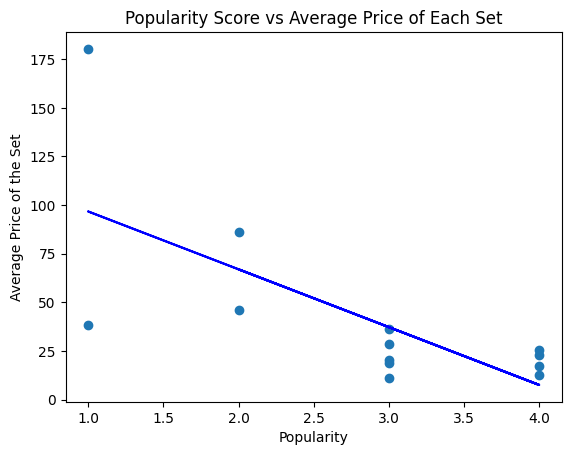

In [42]:
x = prices['popularity']
y = average_price

plt.scatter(x,y)

plt.xlabel("Popularity")
plt.ylabel("Average Price of the Set")
plt.title("Popularity Score vs Average Price of Each Set")

m, b = np.polyfit(x,y, 1)

plt.plot(x, m*x + b, color='blue')

plt.show()